In [1]:
%matplotlib nbagg

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors, cm
plt.ion()

# importing system packages
import os
import sys
import glob
import h5py
import time
import itertools
import tables as tb

# importing the workhorse
import numpy as np
import pandas as pd

# tiff packages
from PIL import Image
import tifffile

# for the fitting procedures
from lmfit import *

In [3]:
runID = 8

In [4]:
# Input file path
#slrFolder = '/xfel/ffs/dat/ue_191117_FXS/raw_data/h5/type=measurement/'
slrFolder = '/xfel/ffs/dat/ue_191123_FXS/raw_data/h5/type=measurement/'
slrFolder += 'run='+str(runID).zfill(3)+'/scan=001'

#imgFolder = '/xfel/ffs/dat/ue_191117_FXS/raw_data/h5/type=raw/'
imgFolder = '/xfel/ffs/dat/ue_191123_FXS/raw_data/h5/type=raw/'
imgFolder += 'run='+str(runID).zfill(3)+'/scan=001'

In [5]:
fnm = 'p'+str(1).zfill(4)+'.h5'
slrpath = os.path.join(slrFolder, fnm)
df = pd.read_hdf(slrpath)

imgpath = os.path.join(imgFolder, fnm)
h5 = tb.open_file(imgpath)

In [6]:
h = h5py.File(imgpath)
print('***** h5 keys *****')
print(list(h.keys()))
print('\n')

print('***** detector keys *****')
print(list(h['detector'].keys()))
print('\n')

print('***** metadata keys *****')
print(list(h['metadata'].keys()))
print('\n')

print('***** pd keys *****')
print(list(h['pd'].keys()))
print('\n')

print('***** qbpm keys *****')
print(list(h['qbpm'].keys()))
print('\n')

***** h5 keys *****
['detector', 'metadata', 'pd', 'qbpm']


***** detector keys *****
['eh1']


***** metadata keys *****
['axis0', 'axis1', 'block0_items', 'block0_values', 'block1_items', 'block1_values', 'block2_items', 'block2_values', 'block3_items', 'block3_values']


***** pd keys *****
['es']


***** qbpm keys *****
['eh1', 'oh']




In [7]:
# Time stamps of images
imgTags = h5.root.detector.eh1.mpccd1.image.axis1[:].tolist()
print(len(imgTags))

300


In [8]:
# Getting the MPCCD image
h5.root.detector.eh1.mpccd1.image.block0_values.shape

(300, 1024, 512)

In [9]:
len(df['event_info.FIFTEEN_HERTZ'])

300

<IPython.core.display.Javascript object>


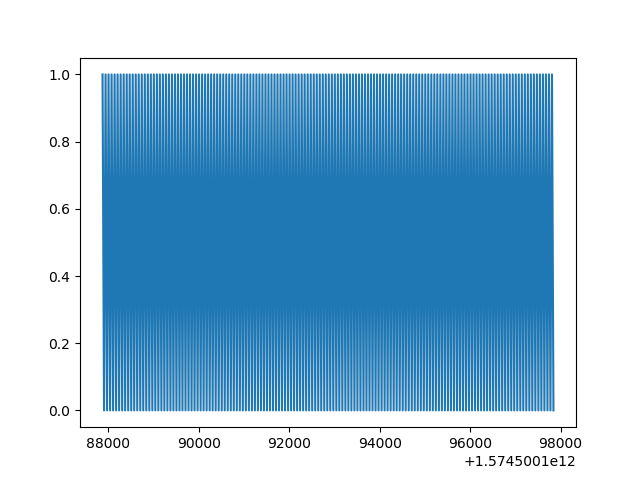

In [10]:
plt.figure()
plt.clf()
plt.plot(df['event_info.FIFTEEN_HERTZ'])

In [11]:
df.columns

Index(['delay_input', 'delay_value', 'optics:oh:DCM:energy',
       'event_info.timestamp_sec', 'event_info.timestamp_usec',
       'event_info.timestamp_nsec', 'event_info.pulse_id',
       'event_info.XFEL_BEAM', 'event_info.SIXTY_HERTZ',
       'event_info.THIRTY_HERTZ',
       ...
       'detector:eh1:mpccd1:ROI3_stat.max',
       'detector:eh1:mpccd1:ROI3_stat.min',
       'detector:eh1:mpccd1:ROI3_stat.mean',
       'detector:eh1:mpccd1:ROI3_stat.std',
       'detector:eh1:mpccd1:ROI3_stat.sum',
       'detector:eh1:mpccd1:ROI3_stat.area',
       'detector:eh1:mpccd1:ROI3_stat.center_of_mass.y',
       'detector:eh1:mpccd1:ROI3_stat.center_of_mass.x',
       'detector:eh1:mpccd1:processing_time', 'event_info.dev_timestamp'],
      dtype='object', length=129)

In [12]:
df[['gonio:eh1:FourC:th','gonio:eh1:FourC:tth', 'gonio:eh1:FourC:chi', 'gonio:eh1:FourC:phi']]

,gonio:eh1:FourC:th,gonio:eh1:FourC:tth,gonio:eh1:FourC:chi,gonio:eh1:FourC:phi
timestamp,,,,
1574500187875,11.61,16.41,90.0,0.0
1574500187908,11.61,16.41,90.0,0.0
1574500187942,11.61,16.41,90.0,0.0
1574500187975,11.61,16.41,90.0,0.0
1574500188008,11.61,16.41,90.0,0.0
...,...,...,...,...
1574500197711,11.61,16.41,90.0,0.0
1574500197744,11.61,16.41,90.0,0.0
1574500197777,11.61,16.41,90.0,0.0
